Code Reference: 
https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files

https://dsp.stackexchange.com/questions/81934/help-on-audio-filter-with-fft-on-python

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html


In [3]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt

# read files
def load_audio(filename):
    # Load the wav file
    sampling_rate, data = scipy.io.wavfile.read(filename)
    return sampling_rate, data

# transfrom audio
def fft_audio(data):
    # Apply Fast Fourier Transform (FFT)
    fft_data = np.fft.rfft(data)
    fft_freq = np.fft.rfftfreq(len(data), 1 / sampling_rate)
    return fft_data, fft_freq

# check the frequency plot
def plot_frequency_spectrum(fft_data, fft_freq):
    # Plot the frequency spectrum
    plt.plot(fft_freq, np.abs(fft_data))
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()

# Audio 1

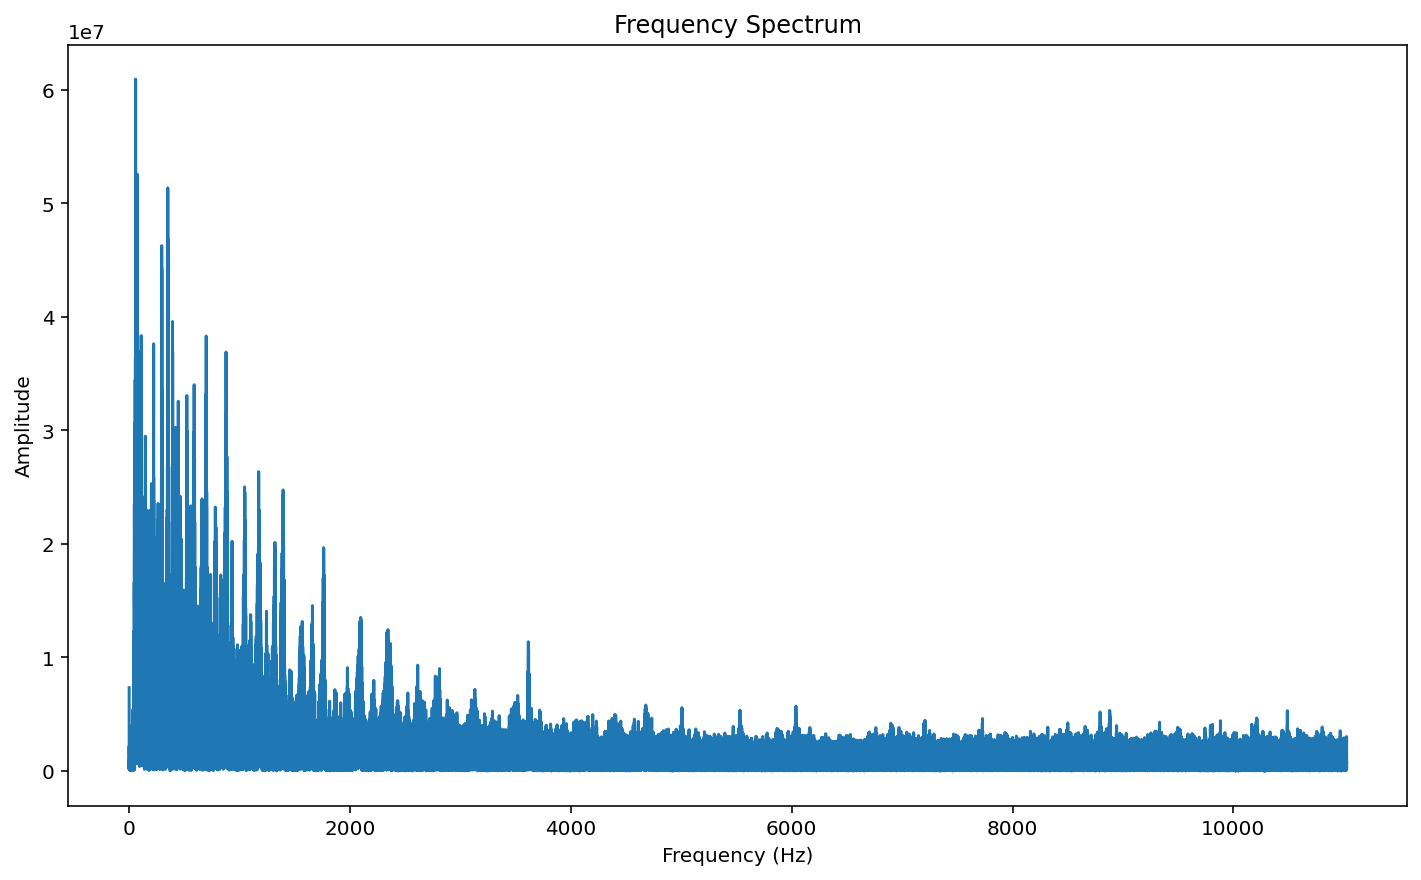

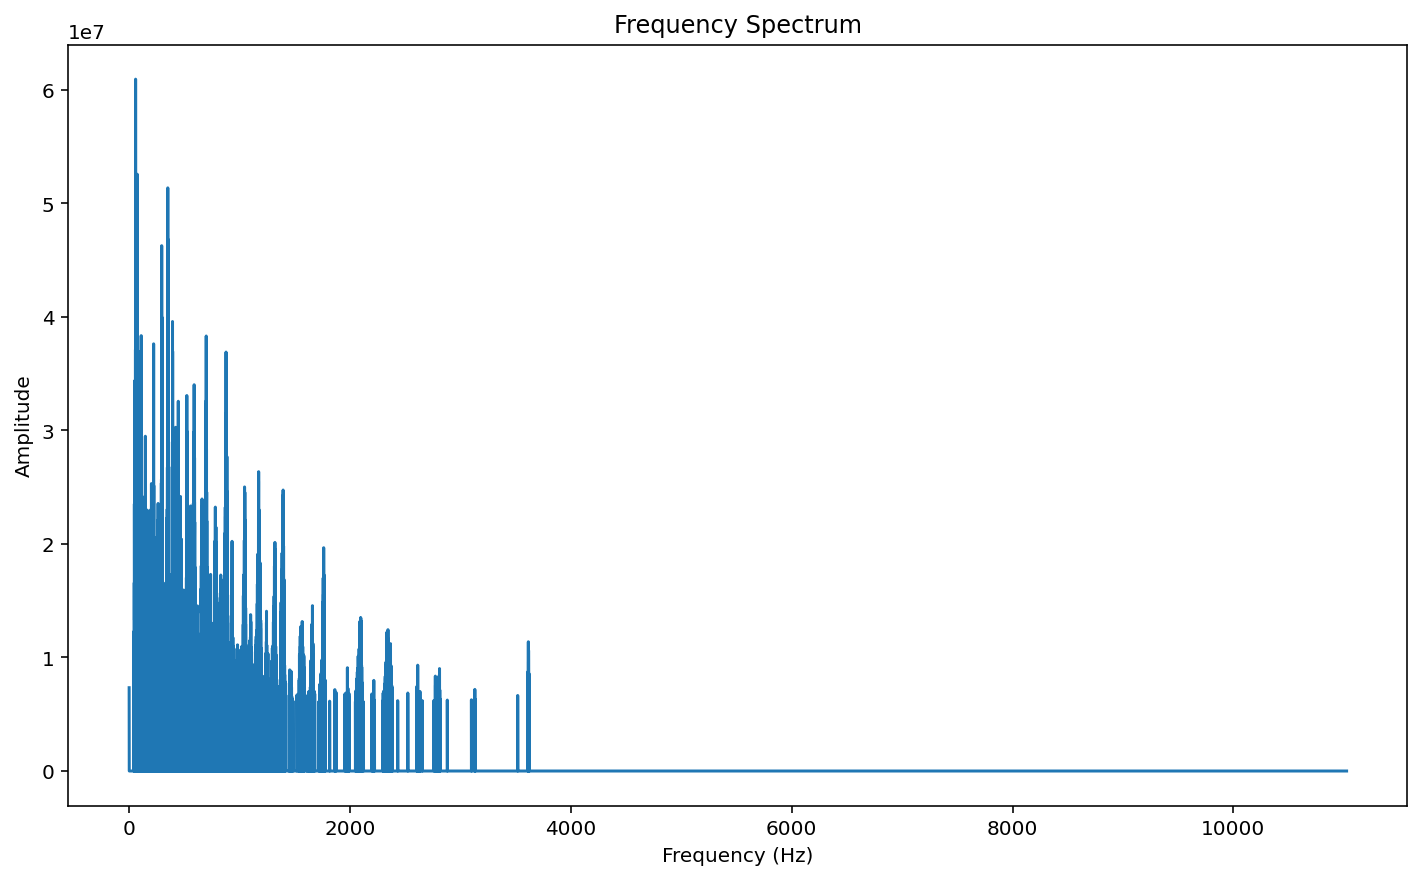

In [4]:
# check audio file
audio_file = f'audio1.wav'
output_file = f'new1.wav'

# Load the audio file
sampling_rate, data = load_audio(audio_file)

# Apply FFT to the audio data
fft_data, fft_freq = fft_audio(data)

# plot the frequency spectrum
plot_frequency_spectrum(fft_data, fft_freq)

# De-noise based on the frequency spectrum
signal = 0.1*np.max(np.abs(fft_data))
def filter_noise(fft_data, threshold=signal):
    # Apply a threshold to filter out noise
    fft_data[np.abs(fft_data) < threshold] = 0
    return fft_data

def ifft_audio(fft_data):
    # Apply Inverse Fast Fourier Transform (iFFT)
    filtered_data = np.fft.irfft(fft_data)
    return filtered_data

def normalize_audio(data, sampling_rate):
    # Normalize the audio signal
    normalized_data = np.int16(data / np.max(np.abs(data)) * sampling_rate )
    return normalized_data

def save_audio(filename, sampling_rate, data):
    # Save the normalized, filtered signal back to a .wav file
    scipy.io.wavfile.write(filename, sampling_rate, data)
    

# Filter out the noise
filtered_fft_data = filter_noise(fft_data)

# Convert the filtered FFT data back to audio signal
filtered_data = ifft_audio(filtered_fft_data)

# Normalize the audio signal
normalized_data = normalize_audio(filtered_data, sampling_rate)

# Save the filtered and normalized audio as a new .wav file
save_audio(output_file, sampling_rate, normalized_data)

filtered_plot = plot_frequency_spectrum(filtered_fft_data, fft_freq)
filtered_plot


# Audio 2

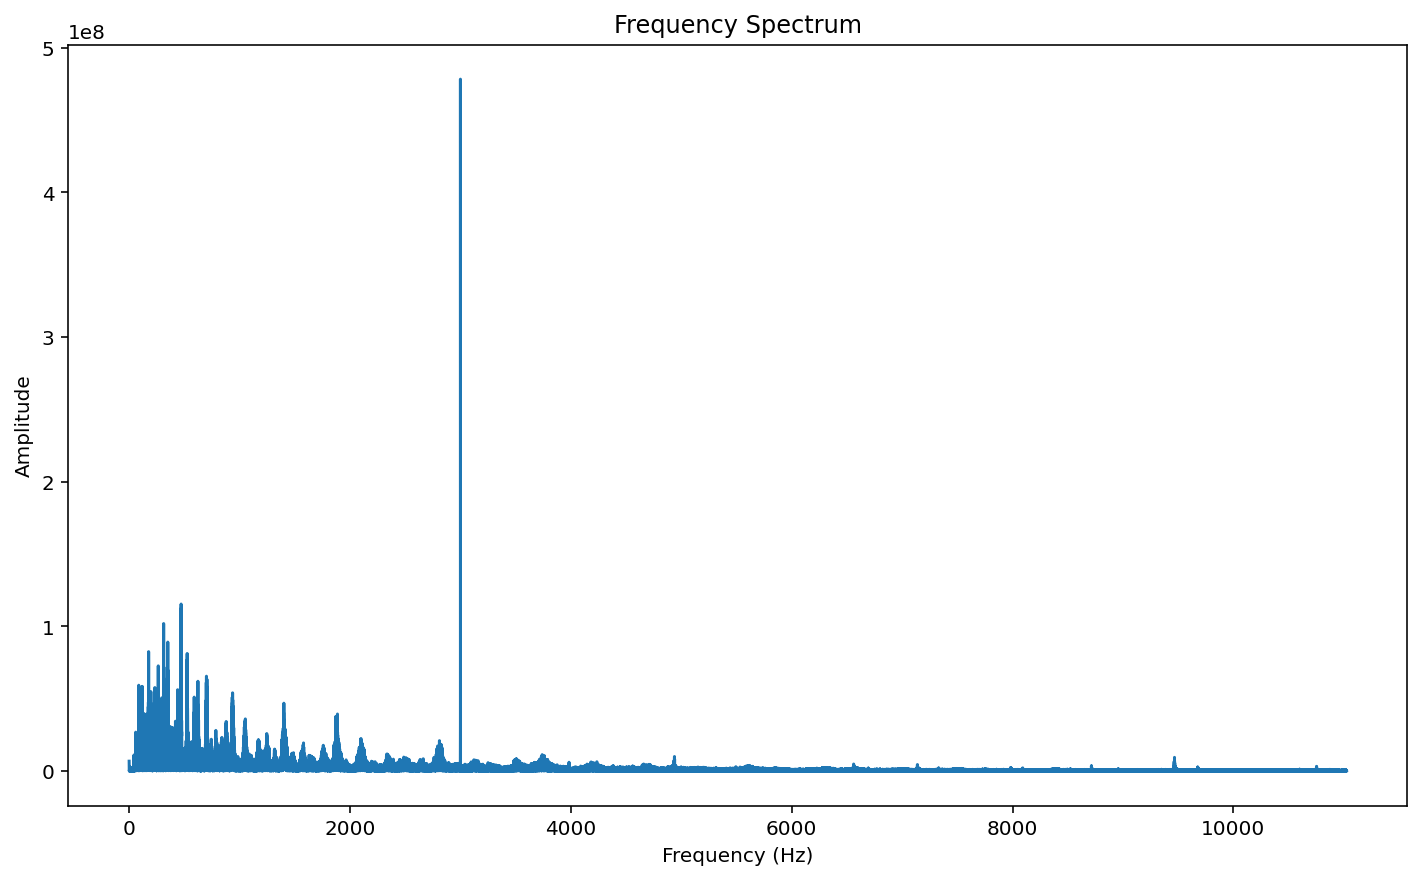

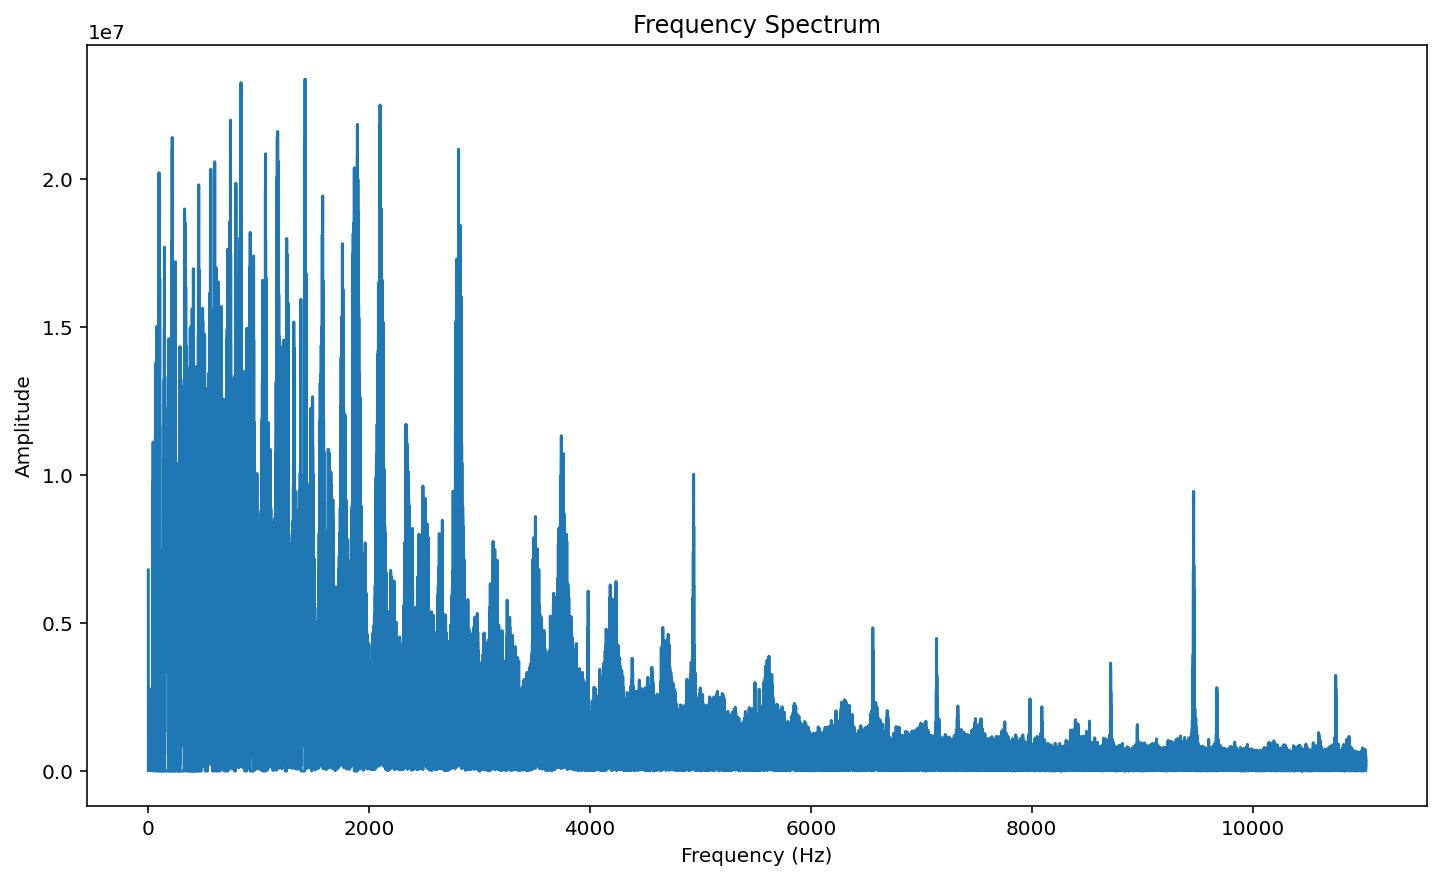

In [5]:
# check audio file
audio_file = f'audio2.wav'
output_file = f'new2.wav'

# Load the audio file
sampling_rate, data = load_audio(audio_file)

# Apply FFT to the audio data
fft_data, fft_freq = fft_audio(data)

# plot the frequency spectrum
plot_frequency_spectrum(fft_data, fft_freq)

def filter_peaks(fft_data, fft_freq, peaks, bandwidth):
    # Apply a notch filter for each peak frequency
    for peak_freq in peaks:
        indices = np.where((fft_freq >= peak_freq - bandwidth/2) & (fft_freq <= peak_freq + bandwidth/2))
        fft_data[indices] = 0
    return fft_data

def ifft_audio(fft_data):
    # Apply Inverse Fast Fourier Transform (iFFT)
    filtered_data = np.fft.irfft(fft_data)
    return filtered_data

def normalize_audio(data, sampling_rate):
    # Normalize the audio signal
    normalized_data = np.int16(data / np.max(np.abs(data)) * sampling_rate )
    return normalized_data

def save_audio(filename, sampling_rate, data):
    # Save the normalized, filtered signal back to a .wav file
    scipy.io.wavfile.write(filename, sampling_rate, data)

from scipy.signal import find_peaks
    
def identify_peaks_to_remove(fft_data, fft_freq, height_threshold):
    # Identify all peaks above a certain height
    peaks, properties = find_peaks(np.abs(fft_data), height=height_threshold)
    # Filter out the peaks by frequency if needed, or return all peaks above the height threshold
    peak_freqs = fft_freq[peaks]
    return peak_freqs

peaks_to_remove = identify_peaks_to_remove(fft_data, fft_freq, height_threshold= 0.05 * np.max(np.abs(fft_data)))
    
# Filter out the noise - remove the peaks as seen in the spectrum
bandwidth = 10  # Define the bandwidth around the peak to filter
filtered_fft_data = filter_peaks(fft_data, fft_freq, peaks_to_remove, bandwidth)

# Convert the filtered FFT data back to audio signal
filtered_data = ifft_audio(filtered_fft_data)

# Normalize the audio signal
normalized_data = normalize_audio(filtered_data, sampling_rate)

# Save the filtered and normalized audio as a new .wav file
save_audio(output_file, sampling_rate, normalized_data)

filtered_plot = plot_frequency_spectrum(filtered_fft_data, fft_freq)
filtered_plot


# Audio 3

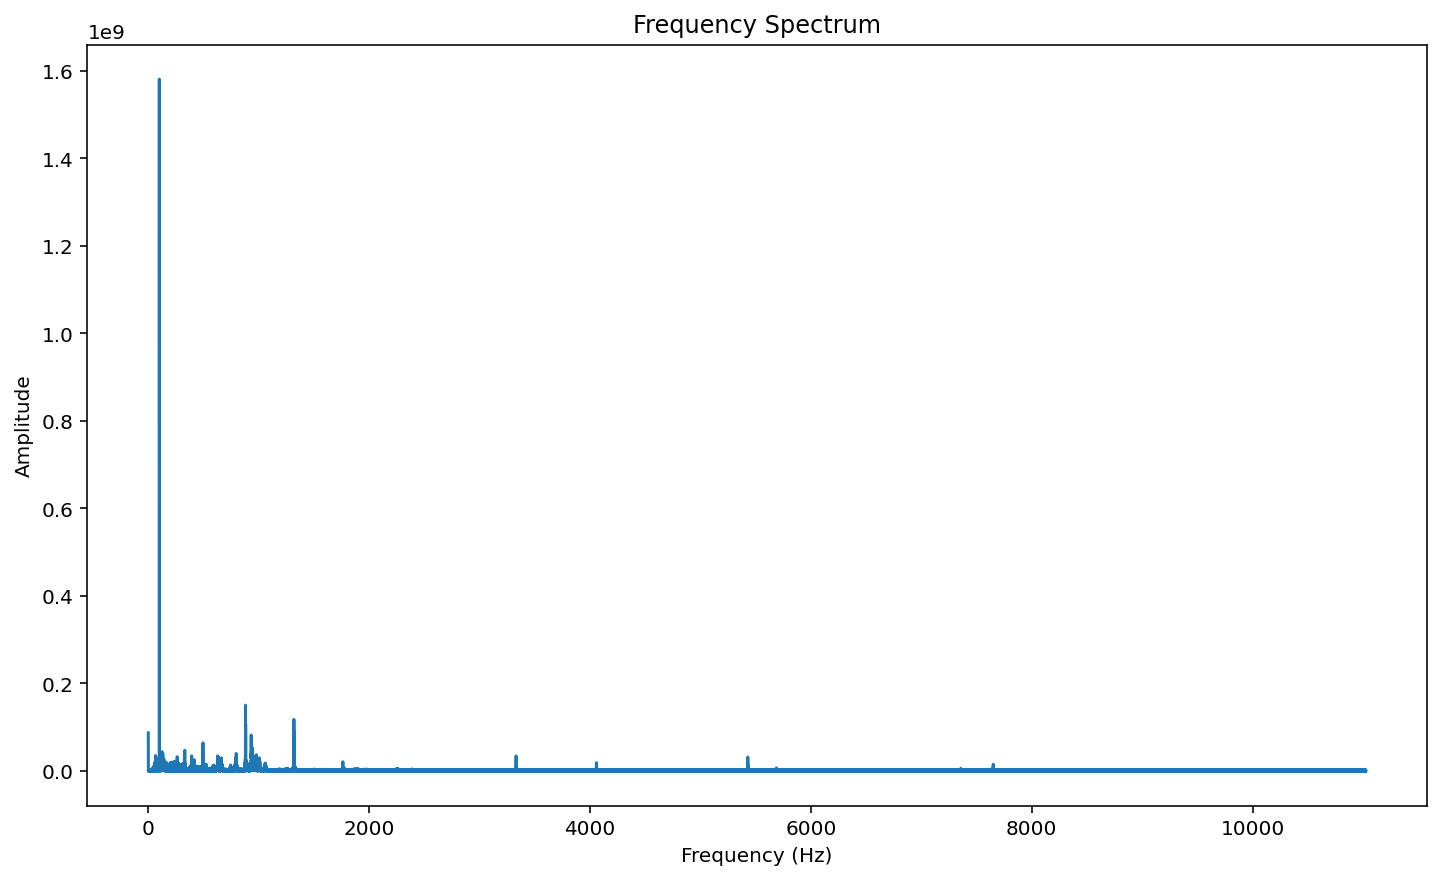

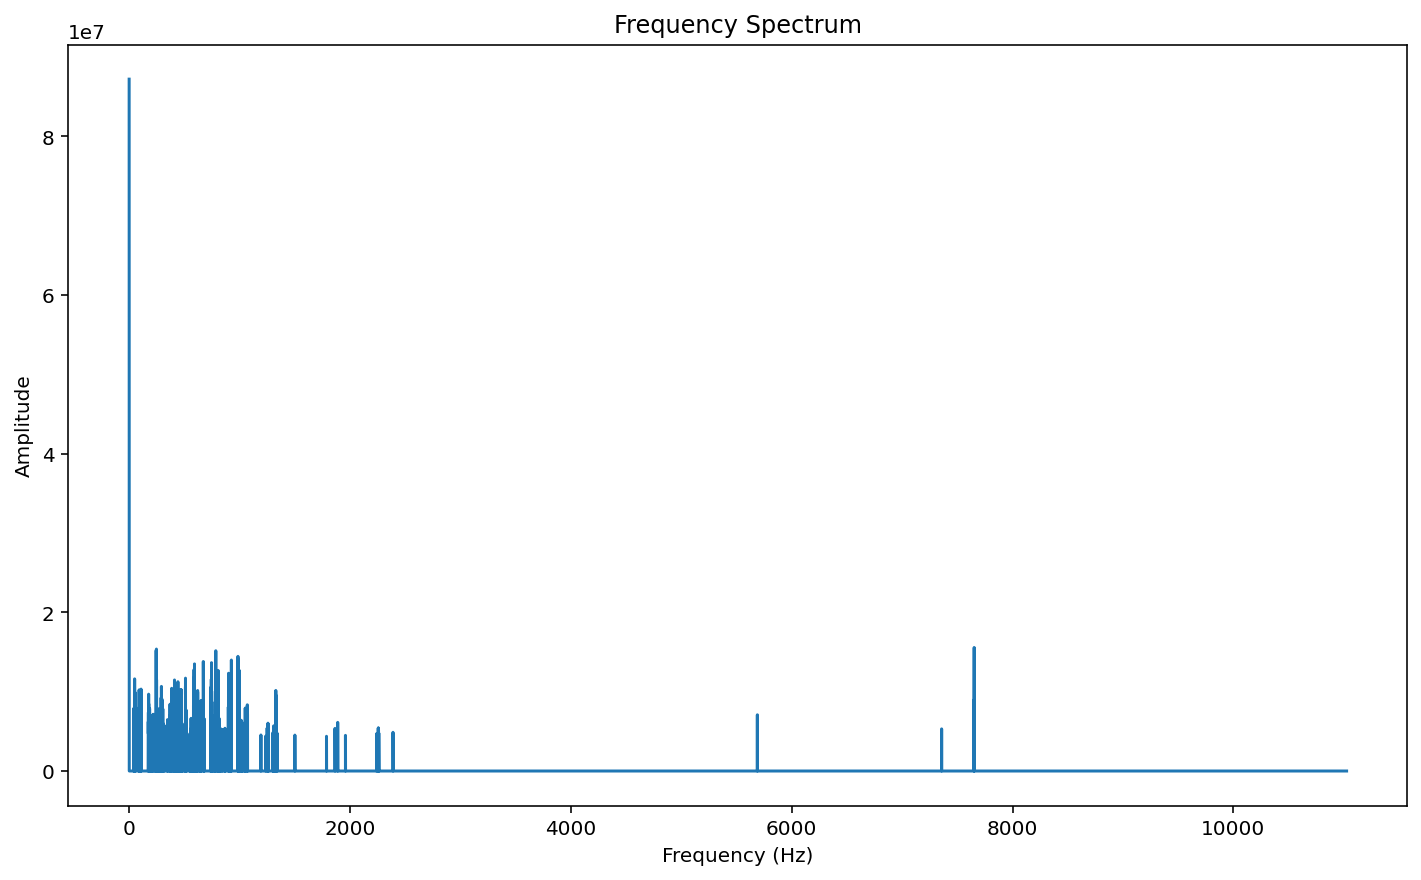

In [24]:
# check audio file
audio_file = f'audio3.wav'
output_file = f'new3.wav'

# Load the audio file
sampling_rate, data = load_audio(audio_file)

# Apply FFT to the audio data
fft_data, fft_freq = fft_audio(data)

# plot the frequency spectrum
plot_frequency_spectrum(fft_data, fft_freq)

def filter_peaks(fft_data, fft_freq, peaks, bandwidth):
    # Apply a notch filter for each peak frequency
    for peak_freq in peaks:
        indices = np.where((fft_freq >= peak_freq - bandwidth/2) & (fft_freq <= peak_freq + bandwidth/2))
        fft_data[indices] = 0
    return fft_data

def ifft_audio(fft_data):
    # Apply Inverse Fast Fourier Transform (iFFT)
    filtered_data = np.fft.irfft(fft_data)
    return filtered_data

def normalize_audio(data, sampling_rate):
    # Normalize the audio signal
    normalized_data = np.int16(data / np.max(np.abs(data)) * sampling_rate )
    return normalized_data

def save_audio(filename, sampling_rate, data):
    # Save the normalized, filtered signal back to a .wav file
    scipy.io.wavfile.write(filename, sampling_rate, data)

from scipy.signal import find_peaks
    
def identify_peaks_to_remove(fft_data, fft_freq, height_threshold):
    # Identify all peaks above a certain height
    peaks, properties = find_peaks(np.abs(fft_data), height=height_threshold)
    # Filter out the peaks by frequency if needed, or return all peaks above the height threshold
    peak_freqs = fft_freq[peaks]
    return peak_freqs

peaks_to_remove = identify_peaks_to_remove(fft_data, fft_freq, height_threshold= 0.01 * np.max(np.abs(fft_data)))
peaks_to_remove = 0 + peaks_to_remove
# Filter out the noise - remove the peak as seen in the spectrum
bandwidth = 10  # Define the bandwidth around the peak to filter
filtered_fft_data = filter_peaks(fft_data, fft_freq, peaks_to_remove, bandwidth)


# De-noise based on the frequency spectrum
signal = 0.05*np.max(np.abs(fft_data))
def filter_noise(fft_data, threshold=signal):
    # Apply a threshold to filter out noise
    fft_data[np.abs(fft_data) < threshold] = 0
    return fft_data

# Filter out the noise
final_filtered_fft_data = filter_noise(filtered_fft_data)

# Convert the filtered FFT data back to audio signal
filtered_data = ifft_audio(final_filtered_fft_data)

# Normalize the audio signal
normalized_data = normalize_audio(filtered_data, sampling_rate)

# Save the filtered and normalized audio as a new .wav file
save_audio(output_file, sampling_rate, normalized_data)

filtered_plot = plot_frequency_spectrum(filtered_fft_data, fft_freq)
filtered_plot

# Audio 4

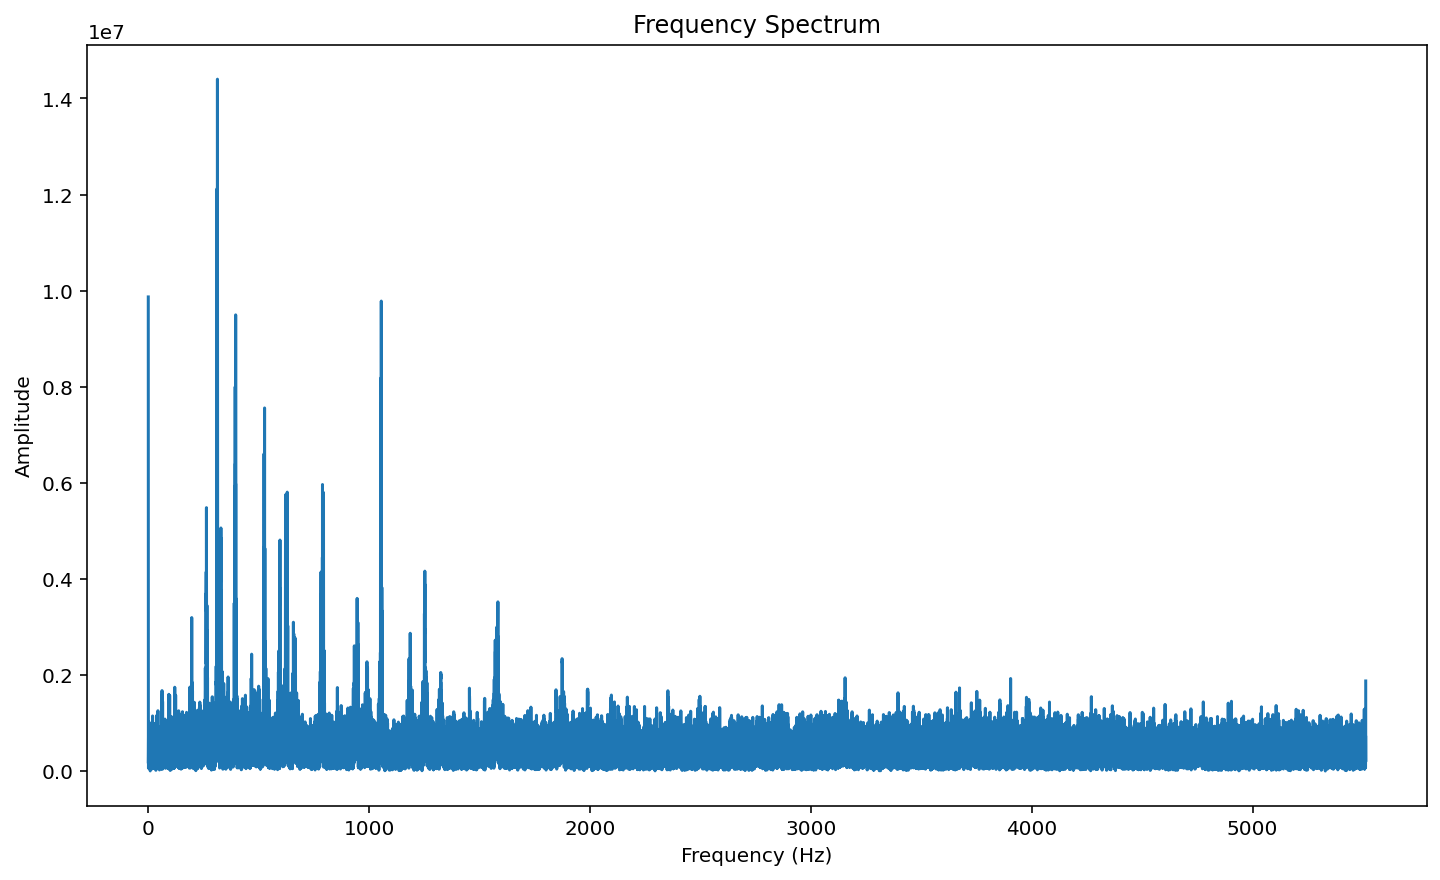

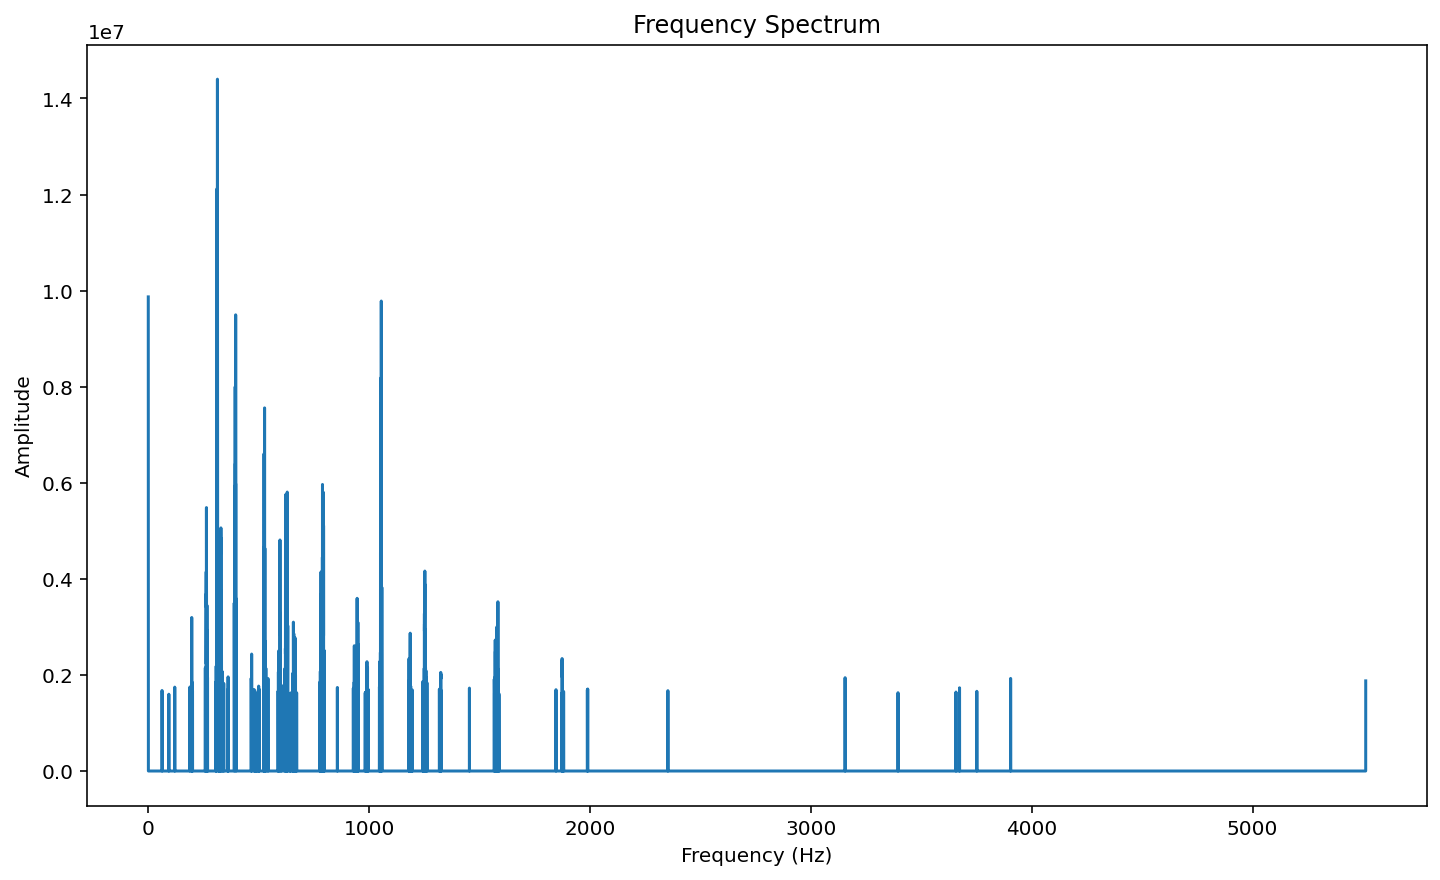

In [16]:
# check audio file
audio_file = f'audio4.wav'
output_file = f'new4.wav'

# Load the audio file
sampling_rate, data = load_audio(audio_file)

# Apply FFT to the audio data
fft_data, fft_freq = fft_audio(data)

# plot the frequency spectrum
plot_frequency_spectrum(fft_data, fft_freq)

signal = 0.11*np.max(np.abs(fft_data))
def filter_noise(fft_data, threshold=signal):
    # Apply a threshold to filter out noise
    fft_data[np.abs(fft_data) < threshold] = 0
    return fft_data

def ifft_audio(fft_data):
    # Apply Inverse Fast Fourier Transform (iFFT)
    filtered_data = np.fft.irfft(fft_data)
    return filtered_data

def normalize_audio(data, sampling_rate):
    # Normalize the audio signal
    normalized_data = np.int16(data / np.max(np.abs(data)) * sampling_rate )
    return normalized_data

def save_audio(filename, sampling_rate, data):
    # Save the normalized, filtered signal back to a .wav file
    scipy.io.wavfile.write(filename, sampling_rate, data)
    

# Filter out the noise
filtered_fft_data = filter_noise(fft_data)

# Convert the filtered FFT data back to audio signal
filtered_data = ifft_audio(filtered_fft_data)

# Normalize the audio signal
normalized_data = normalize_audio(filtered_data, sampling_rate)

# Save the filtered and normalized audio as a new .wav file
save_audio(output_file, sampling_rate, normalized_data)

filtered_plot = plot_frequency_spectrum(filtered_fft_data, fft_freq)
filtered_plot